# Techniques vues en TP:

## 1) Reduction de dimension

### - Principal Component Analysis (PCA)

-> Quantitatif

-> Non supervisé

-> Maximiser la variance globale

### - Linear Discriminant Analysis (LDA)

-> Quantitatif

-> Supervisé

-> Maximiser la séparation entre classes (La LDA sert aussi pour la classification) La LDA sert si nos données sont étiquetées

### - Correspondent Analysis (CA)

-> Qualitatif

-> Non supervisé

-> Sert à analyser la relation entre deux variables

### - Multiple Correspondent Analysis (MCA)

-> Qualitatif

-> Non supervisé

-> Sert à analyser la relation entre plusieurs variables

### - Multiple Factorial Analysis (MFA)

-> Quantitatif + Qualitatif 

-> Non supervisé

-> Sert analyser l'effet de groupes (blocs) sur les individus

## 2) Reduction de dimension non linéaire

### - Kernel Principal Component Analysis (KPCA)

### - Non-negative matrix factorization (NMF)

### - Multidimensional scaling (MDS)

## 3) Clustering

### - K-means

### - Hierarchical Agglomerative Clustering (HAC)

### - Gaussian Mixture Models (GMM)

### - Stochastic Bloc Model (SBM)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prince

In [3]:
marketing = pd.read_csv('marketing_campaign.csv',sep="\t")

In [4]:
marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# je fais un mini nettoyage des données avant

In [7]:
marketing.drop(['Z_CostContact','Z_Revenue'], axis=1, inplace=True)

In [8]:
marketing.fillna({'Income': marketing['Income'].median()}, inplace=True)

In [9]:
riche = marketing.loc[marketing['Income']>600000, 'ID']
print(riche)

2233    9432
Name: ID, dtype: int64


In [10]:
marketing = marketing.drop(marketing[marketing['ID']==9432].index)

In [11]:
# on tente une première réduction de dimensions sur les données quantitatives

In [12]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [13]:
# On veut garder seulement les valeurs quantitatives
# On ne sélectionne que les colonnes contenant des valeurs numériques. select_dtypes permet de faire une sélection sur les colonnes 
# et include=[np.number] est l'argument qui permet de spécifier que l'on veut que des nombres.

marketing_numerique = marketing.select_dtypes(include=[np.number])

In [14]:
marketing_numerique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2239 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2239 non-null   int64  
 1   Year_Birth           2239 non-null   int64  
 2   Income               2239 non-null   float64
 3   Kidhome              2239 non-null   int64  
 4   Teenhome             2239 non-null   int64  
 5   Recency              2239 non-null   int64  
 6   MntWines             2239 non-null   int64  
 7   MntFruits            2239 non-null   int64  
 8   MntMeatProducts      2239 non-null   int64  
 9   MntFishProducts      2239 non-null   int64  
 10  MntSweetProducts     2239 non-null   int64  
 11  MntGoldProds         2239 non-null   int64  
 12  NumDealsPurchases    2239 non-null   int64  
 13  NumWebPurchases      2239 non-null   int64  
 14  NumCatalogPurchases  2239 non-null   int64  
 15  NumStorePurchases    2239 non-null   int64 

In [15]:
# ici on enlève toutes les colonnes contenant des valeurs binaires, qui sont en fait des variables qualitatives. 
# on enlève aussi l'ID du client qui n'est pas une variable permettant de le classifier (à revoir car c'est aussi ce qui permet de l'identifier)

marketing_numerique = marketing_numerique.drop('AcceptedCmp1',axis=1)
marketing_numerique = marketing_numerique.drop('AcceptedCmp2',axis=1)
marketing_numerique = marketing_numerique.drop('AcceptedCmp3',axis=1)
marketing_numerique = marketing_numerique.drop('AcceptedCmp4',axis=1)
marketing_numerique = marketing_numerique.drop('AcceptedCmp5',axis=1)
marketing_numerique = marketing_numerique.drop('Complain',axis=1)
marketing_numerique = marketing_numerique.drop('Response',axis=1)
marketing_numerique = marketing_numerique.drop('ID',axis=1)

In [16]:
marketing_numerique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2239 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2239 non-null   int64  
 1   Income               2239 non-null   float64
 2   Kidhome              2239 non-null   int64  
 3   Teenhome             2239 non-null   int64  
 4   Recency              2239 non-null   int64  
 5   MntWines             2239 non-null   int64  
 6   MntFruits            2239 non-null   int64  
 7   MntMeatProducts      2239 non-null   int64  
 8   MntFishProducts      2239 non-null   int64  
 9   MntSweetProducts     2239 non-null   int64  
 10  MntGoldProds         2239 non-null   int64  
 11  NumDealsPurchases    2239 non-null   int64  
 12  NumWebPurchases      2239 non-null   int64  
 13  NumCatalogPurchases  2239 non-null   int64  
 14  NumStorePurchases    2239 non-null   int64  
 15  NumWebVisitsMonth    2239 non-null   int64 

In [17]:
# StandardScaler est une classe de la bibliothèque scikit-learn qui permet de normaliser (centrer réduire) les données

scaler = StandardScaler()

# On va donc centrer et réduire nos données marketing car sinon les revenus annuels biaisent trop l'analyse (entre 20 000 et 100 000 en valeur)

marketing_scaled = scaler.fit_transform(marketing_numerique)

[0.3900376  0.12162945 0.07746902 0.06275283 0.05163676 0.04790897
 0.03974314 0.03802395 0.02918183 0.02855826 0.02622311 0.02430991
 0.02190541 0.01583159 0.01423146 0.0105567 ]


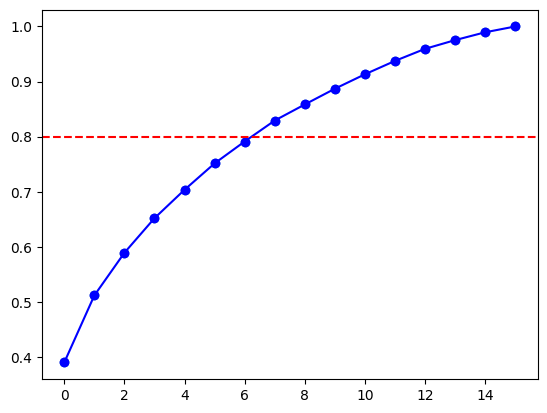

In [18]:
# PCA est une classe de la bibliothèque scikit-learn qui permet d'effectuer des ACP.

pca = PCA()

# Ici, on fait fit_transform : fit calcule les composantes principales et les valeurs propres de notre ACP
# transform applique la transformation, càd projete nos données dans cet espace de dimension réduite.

marketing_pca = pca.fit_transform(marketing_scaled)

# On print la part de variance de chaque axe (valeur propre de chaque axe)

print(pca.explained_variance_ratio_)

# On trace le graphique des variances cumulées, avec un trait à 80 % de variance expliquée

plt.scatter(np.arange(16),np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.arange(16),np.cumsum(pca.explained_variance_ratio_), color='blue', linestyle='-', marker='o')
plt.axhline(y=0.8, color='red', linestyle='--')
plt.show()

In [19]:
# Même méthode qu'avant, mais ici on met directement qu'on veut s'arrêter à 80 % de la variance

pca = PCA(0.8)
marketing_pca = pca.fit_transform(marketing_scaled)
print(pca.explained_variance_ratio_)

[0.3900376  0.12162945 0.07746902 0.06275283 0.05163676 0.04790897
 0.03974314 0.03802395]


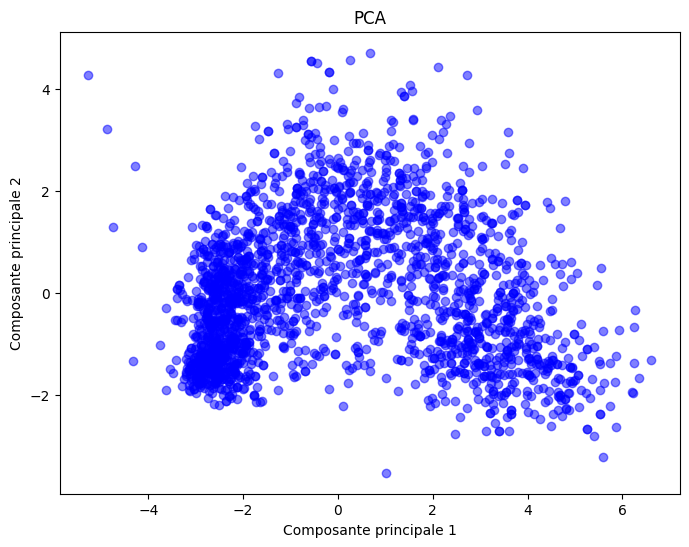

In [20]:
# on peut visualiser les deux premières dimensions

plt.figure(figsize=(8, 6))
plt.scatter(marketing_pca[:, 0], marketing_pca[:, 1], c='blue',alpha=0.5)
plt.title('PCA')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.show()

In [21]:
# On peut aussi visualiser la contribution de chaque variable aux axes de notre ACP. Ici, on a tracé pour les trois premières dimensions.

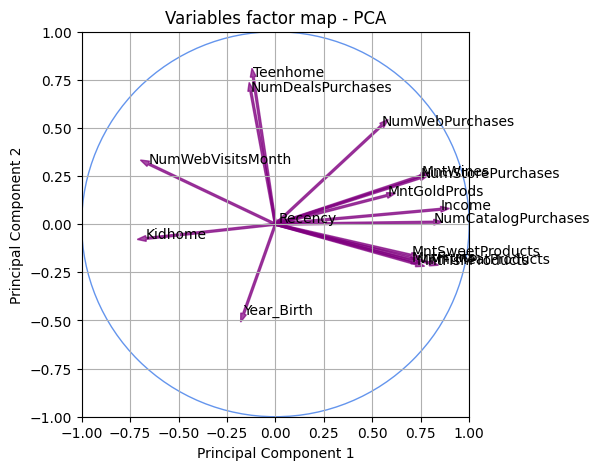

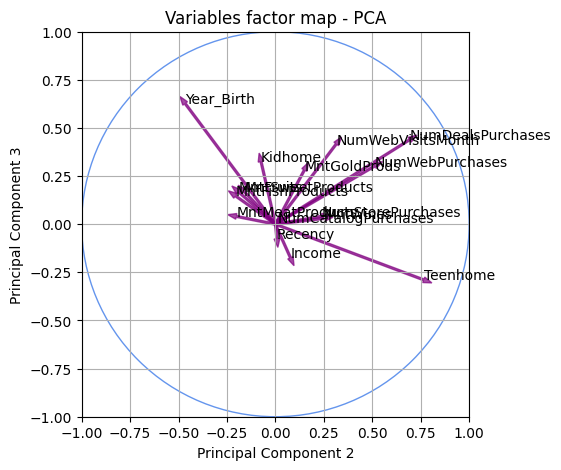

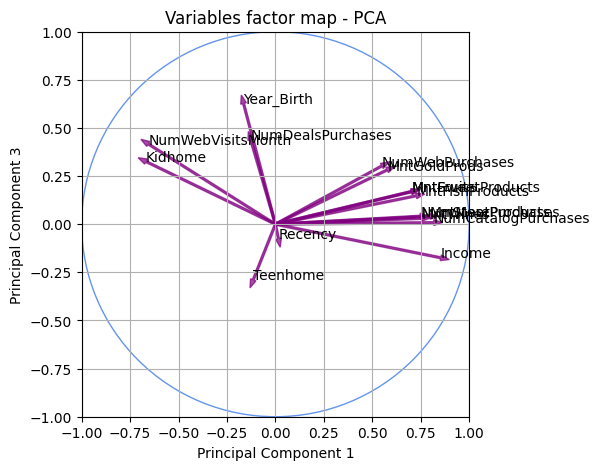

In [22]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, marketing_numerique.columns):
    plt.text(i, j, nom, fontsize=10)
    plt.arrow(0, 0, i, j, color = 'purple', alpha=0.7, width = 0.01)

plt.axis((-1, 1, -1, 1))
plt.gcf().gca().add_artist(plt.Circle((0, 0), radius = 1, color = 'cornflowerblue', fill = False))

plt.title('Variables factor map - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.grid(True)
plt.show()

coord1 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])
coord2 = pca.components_[2] * np.sqrt(pca.explained_variance_[2])

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, marketing_numerique.columns):
    plt.text(i, j, nom, fontsize=10)
    plt.arrow(0, 0, i, j, color = 'purple', alpha=0.7, width = 0.01)

plt.axis((-1, 1, -1, 1))
plt.gcf().gca().add_artist(plt.Circle((0, 0), radius = 1, color = 'cornflowerblue', fill = False))

plt.title('Variables factor map - PCA')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')

plt.grid(True)
plt.show()

coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[2] * np.sqrt(pca.explained_variance_[2])

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, marketing_numerique.columns):
    plt.text(i, j, nom, fontsize=10)
    plt.arrow(0, 0, i, j, color = 'purple', alpha=0.7, width = 0.01)

plt.axis((-1, 1, -1, 1))
plt.gcf().gca().add_artist(plt.Circle((0, 0), radius = 1, color = 'cornflowerblue', fill = False))

plt.title('Variables factor map - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')

plt.grid(True)
plt.show()

In [23]:
# On va effectuer une réduction de dimension sur les variables qualitatives maintenant
# Cela s'appelle une MCA (Multiple Correspondant Analysis)
# Pour l'effectuer, on a deux solutions : utiliser la classe mca de la bibliothèque Prince ou continuer d'utiliser scikit-learn
# Prince est plus adapté à la MCA puisque on peut l'affectuer directement avec une fonction mca
# Scikit learn ne peut pas l'effectuer directement, il faut encoder les données, puis faire une ACP, mais scikit est plus optimisé pour
# des gros volumes de données.
# Pour rester dans la logique du notebook et au vu du gros volume, on va rester sur scikit

In [24]:
# On va isoler les données qualitatives

marketing_quali1 = marketing.select_dtypes(include=['object'])
marketing_quali1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2239 entries, 0 to 2239
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Education       2239 non-null   object
 1   Marital_Status  2239 non-null   object
 2   Dt_Customer     2239 non-null   object
dtypes: object(3)
memory usage: 70.0+ KB


In [25]:
# on drop Dt_customer car c'est une date et elle ne doit pas être considéré comme qualitatif

marketing_quali1 = marketing_quali1.drop('Dt_Customer',axis=1)

In [26]:
# on isole toutes les données binaires

marketing_quali2 = [col for col in marketing.columns if marketing[col].nunique() == 2 and set(marketing[col].dropna().unique()) <= {0, 1}]

# on transforme en dataframe

marketing_quali2 = marketing[marketing_quali2]

In [27]:
# on ajoute les deux colonnes pour se retrouver qu'avec les variables quali

marketing_quali = pd.concat([marketing_quali1, marketing_quali2], axis=1)
marketing_quali.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2239 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Education       2239 non-null   object
 1   Marital_Status  2239 non-null   object
 2   AcceptedCmp3    2239 non-null   int64 
 3   AcceptedCmp4    2239 non-null   int64 
 4   AcceptedCmp5    2239 non-null   int64 
 5   AcceptedCmp1    2239 non-null   int64 
 6   AcceptedCmp2    2239 non-null   int64 
 7   Complain        2239 non-null   int64 
 8   Response        2239 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 174.9+ KB


In [29]:
# on initialise notre classe encoder

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

# le fit_transform nous retourne une matrice sparse, pas manipulable par les fonctions d'analyse de donnés. On la transforme donc en tableau
# avec .toarray() pour pouvoir le manipuler. 
# Cela peut être risqué car si on a trop de données car le tableau prendrait énormément d'espace en mémoire comparé au sparse, mais ici 
# ça devrait aller

marketing_encoded = encoder.fit_transform(marketing_quali).toarray()

# Que fait encoder? marketing_encoded est composé de 0 et de 1. Les colonnes de ce tableau sont toutes les modalités de toutes les variables.
# Les lignes sont les individus
# Dans chaque case, on met 1 si l'individu à cette modalité, 0 sinon

In [30]:
# On applique une ACP sur nos données encodées (ce qui équivaut à une MCA)

mca = PCA(0.8)
marketing_mca = mca.fit_transform(marketing_encoded)
print(mca.explained_variance_ratio_)

[0.15935802 0.15101584 0.14502042 0.10485874 0.08383843 0.0741514
 0.05619172 0.05063063]


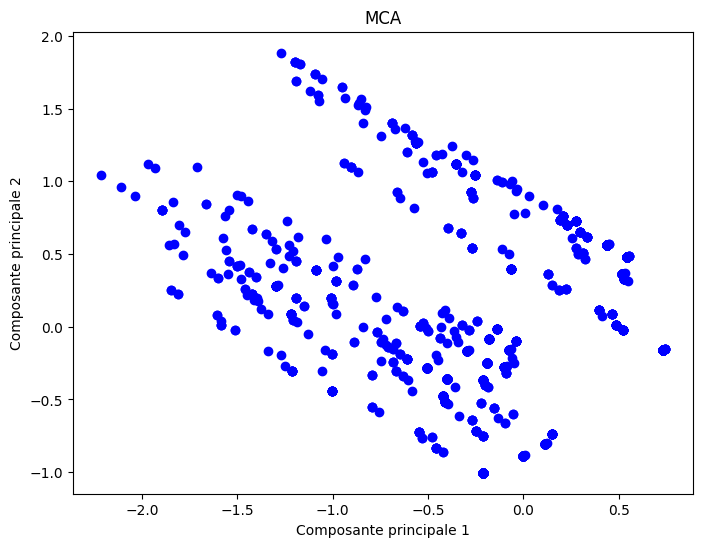

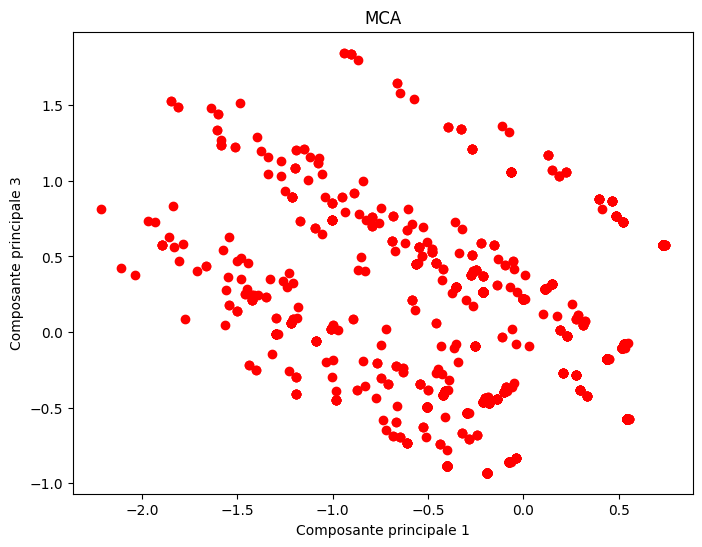

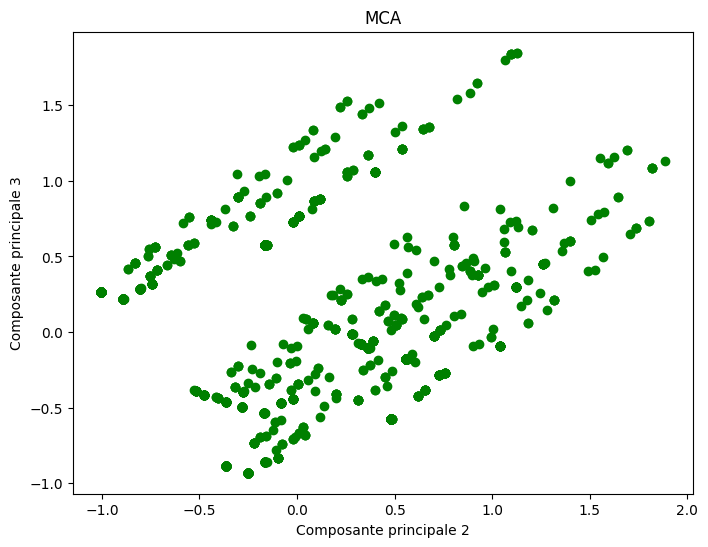

In [31]:
# on peut visualiser les trois premières dimensions

plt.figure(figsize=(8, 6))
plt.scatter(marketing_mca[:, 0], marketing_mca[:, 1], c='blue')
plt.title('MCA')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(marketing_mca[:, 0], marketing_mca[:, 2], c='red')
plt.title('MCA')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 3')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(marketing_mca[:, 1], marketing_mca[:, 2], c='green')
plt.title('MCA')
plt.xlabel('Composante principale 2')
plt.ylabel('Composante principale 3')
plt.show()

In [32]:
# on fait avec Prince maintenant

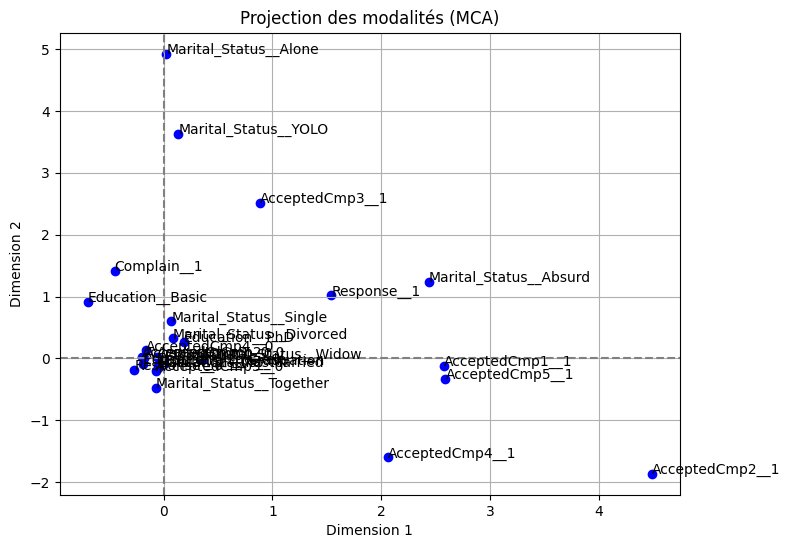

Cos² des modalités :
                                     0         1
Education__2n Cycle       3.622365e-03  0.000771
Education__Basic          1.197442e-02  0.020759
Education__Graduation     3.899136e-07  0.009320
Education__Master         3.478549e-04  0.003750
Education__PhD            9.739584e-03  0.019039
Marital_Status__Absurd    5.326086e-03  0.001356
Marital_Status__Alone     8.117193e-07  0.032528
Marital_Status__Divorced  8.135067e-04  0.012318
Marital_Status__Married   1.659924e-03  0.010217
Marital_Status__Single    1.290709e-03  0.097792
Marital_Status__Together  1.753467e-03  0.079668
Marital_Status__Widow     4.629973e-03  0.000003
Marital_Status__YOLO      1.601028e-05  0.011748
AcceptedCmp3__0           6.133901e-02  0.496084
AcceptedCmp3__1           6.133901e-02  0.496084
AcceptedCmp4__0           3.417265e-01  0.205698
AcceptedCmp4__1           3.417265e-01  0.205698
AcceptedCmp5__0           5.270119e-01  0.008489
AcceptedCmp5__1           5.270119e-01  0.008489

In [34]:
mca = prince.MCA(n_components=2, random_state=42)
mca = mca.fit(marketing_quali)
modalities_coords = mca.column_coordinates(marketing_quali)
plt.figure(figsize=(8, 6))
plt.scatter(modalities_coords[0], modalities_coords[1], color='blue')
for i, label in enumerate(modalities_coords.index):
    plt.text(modalities_coords.iloc[i, 0], modalities_coords.iloc[i, 1], label, fontsize=10)

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Projection des modalités (MCA)")
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.grid(True)
plt.show()


cos2 = mca.column_cosine_similarities(marketing_quali)
print("Cos² des modalités :")
print(cos2)

In [ ]:
# Ces resultats me perturbent car les flèches sont quasiment les mêmes

In [ ]:
# On peut essayer de classifier en utilisant un K-means

In [ ]:
# On essaye la méthode du coude pour obtenir le nombre de clusters optimaux

wcss = []

# On teste pour différents nombres de clusters k

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(marketing_pca)
    wcss.append(kmeans.inertia_)

# On trace le graphique du coude

plt.plot(range(1, 10), wcss)
plt.title("Méthode du coude")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("WCSS (inertie intra-cluster)")
plt.show()

In [ ]:
# On applique le K-Means sur nos données projetées dans l'espace de l'ACP (de dimension 6)

kmeans = KMeans(n_clusters=3, random_state=42)  # Choisir le nombre de clusters (ici 3)
clusters_k = kmeans.fit_predict(marketing_pca)  # Effectuer le clustering

plt.scatter(marketing_pca[:, 0], marketing_pca[:, 1], c=clusters_k, cmap='viridis')
plt.title("Clustering K-Means sur les Composantes Principales 1 et 2")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.show()

plt.scatter(marketing_pca[:, 0], marketing_pca[:, 2], c=clusters_k, cmap='viridis')
plt.title("Clustering K-Means sur les Composantes Principales 1 et 3")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 3")
plt.show()

plt.scatter(marketing_pca[:, 1], marketing_pca[:, 2], c=clusters_k, cmap='viridis')
plt.title("Clustering K-Means sur les Composantes Principales 2 et 3")
plt.xlabel("Composante principale 2")
plt.ylabel("Composante principale 3")
plt.show()

In [ ]:
# On va tenter une classification en Hierarchical Agglomerative Clustering (HAC)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
# On utilise la classe ac de la libraire scikit-learn

ac = AgglomerativeClustering(linkage="ward", compute_distances=True)
clusters_h = ac.fit_predict(marketing_pca)

In [ ]:
# On va utiliser la méthode du coude pour déterminer le nombre de clusters optimal

# Ceci est un tableau de taille n-1 (si on a n données) qui correspond à la distance de fusion
# des différents clusters. Cela permet de visualiser comment les clusters se rapprochent au fil des itérations

distances = ac.distances_

# On trace un graphique qui représente le nombre de clusters en fonction de la distance

n_sizes = 20
x = np.arange(n_sizes, 0, -1)
y = ac.distances_[-n_sizes:]

plt.scatter(x, y)

plt.xlabel('Point indices')
plt.ylabel('Distances')
plt.title("Choix du nombre de classes")
plt.show()

In [ ]:
# On voit donc qu'après 3 clusters, la distance de fusion entre clusters augmente fortement
# On en déduit que 3 clusters est un nombre optimal

# On fait un dendogramme pour voir la construction des clusters de la méthode HAC
# Chaque point de donnée commence dans son propre cluster. Ainsi, si on a n points de données, on commence avec n clusters
# L'algorithme identifie les deux clusters les plus proches et les fusionne pour former un nouveau cluster
# Ce processus de fusion est basé sur la proximité entre les clusters, et il peut être mesuré de différentes manières que l'on verra après
# Après chaque fusion de deux clusters, le nombre total de clusters diminue de un 
# Ce processus est répété jusqu'à ce qu'il ne reste plus qu’un seul cluster ou jusqu'à ce que l’on décide d’arrêter à un nombre de clusters prédéfini

In [ ]:
# On trace le dendogramme 

K = 3

ac = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusters_h = ac.fit_predict(marketing_pca)

children = ac.children_
distances = ac.distances_
n_observations = np.arange(2, children.shape[0]+2)
linkage_matrix = np.c_[children, distances, n_observations]

# Cutting the dendrogram to get K classes
max_d = .5*(ac.distances_[-K]+ac.distances_[-K+1])
plt.axhline(y=max_d, c='k')

sch.dendrogram(linkage_matrix, color_threshold=max_d, labels=ac.labels_)

plt.title("Dendrogram with Ward linkage")
plt.show()

In [ ]:
# Le dendogramme se construit donc de bas en haut. La hauteur à laquelle se fait une fusion indique la similitude entre les deux
# clusters fusionnés. Autrement dit, plus la fusion est haute, moins les deux clusters fusionnés se ressemblent
# C'est à nous de déterminer ensuite quel est le nombre de clusters optimal, en équilibrant entre nombre de clusters et homogénéité des clusters
# On tire un trait horizontal pour déterminer le nombre de clusters

In [ ]:
# On visualise les individus classés dans l'espace de l'acp

colors = ['red', 'green', 'orange']

plt.scatter(marketing_pca[:, 0], marketing_pca[:, 1], c=[colors[i-1] for i in clusters_h])
plt.title('Scatter Plot - Clustering Hiérarchique')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.show()

plt.scatter(marketing_pca[:, 0], marketing_pca[:, 2], c=[colors[i-1] for i in clusters_h])
plt.title('Scatter Plot - Clustering Hiérarchique')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 3')
plt.show()

plt.scatter(marketing_pca[:, 1], marketing_pca[:, 2], c=[colors[i-1] for i in clusters_h])
plt.title('Scatter Plot - Clustering Hiérarchique')
plt.xlabel('Composante principale 2')
plt.ylabel('Composante principale 3')
plt.show()

In [ ]:
# On va comparer nos classifications

fig, axs = plt.subplots(3, 2, figsize=(15, 10)) 

axs[0,0].scatter(marketing_pca[:, 0], marketing_pca[:, 1], c=clusters_k, cmap='viridis')
axs[0,0].set_title("K-means - x = Dim 1, y =  Dim2")

axs[0,1].scatter(marketing_pca[:, 0], marketing_pca[:, 1], c=[colors[i-1] for i in clusters_h])
axs[0,1].set_title("HAC - x = Dim1 , y = Dim2")

axs[1,0].scatter(marketing_pca[:, 0], marketing_pca[:, 2], c=clusters_k, cmap='viridis')
axs[1,0].set_title("K-means - x=Dim 1, y=Dim3")

axs[1,1].scatter(marketing_pca[:, 0], marketing_pca[:, 2], c=[colors[i-1] for i in clusters_h])
axs[1,1].set_title("HAC - x = Dim1 , y = Dim3")

axs[2,0].scatter(marketing_pca[:, 1], marketing_pca[:, 2], c=clusters_k, cmap='viridis')
axs[2,0].set_title("K-means - x=Dim 2, y=Dim3")

axs[2,1].scatter(marketing_pca[:, 1], marketing_pca[:, 2], c=[colors[i-1] for i in clusters_h])
axs[2,1].set_title("HAC - x = Dim2 , y = Dim3")

plt.tight_layout()
plt.show()

In [ ]:
# Allez, on passe au Gaussian Mixture Model! (GMM)

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score 

In [ ]:
# On utilise la classe GaussianMixture de scikit-learn

K = 3

gmm = GaussianMixture(n_components=K, n_init=10, random_state=42)
clusters_gmm = gmm.fit_predict(marketing_pca)

In [ ]:
# On va visulaliser les résultats

colors_gmm = ['blue', 'magenta', 'black']

plt.scatter(marketing_pca[:, 0], marketing_pca[:, 1], c=[colors_gmm[i-1] for i in clusters_gmm])
plt.title('Scatter Plot - GMM')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.show()

plt.scatter(marketing_pca[:, 0], marketing_pca[:, 2], c=[colors_gmm[i-1] for i in clusters_gmm])
plt.title('Scatter Plot - GMM')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 3')
plt.show()

plt.scatter(marketing_pca[:, 1], marketing_pca[:, 2], c=[colors_gmm[i-1] for i in clusters_gmm])
plt.title('Scatter Plot - GMM')
plt.xlabel('Composante principale 2')
plt.ylabel('Composante principale 3')
plt.show()

In [ ]:
# On va comparer nos classifications

fig, axs = plt.subplots(3, 3, figsize=(15, 10)) 

axs[0,0].scatter(marketing_pca[:, 0], marketing_pca[:, 1], c=clusters_k, cmap='viridis')
axs[0,0].set_title("K-means - x = Dim 1, y =  Dim2")

axs[0,1].scatter(marketing_pca[:, 0], marketing_pca[:, 1], c=[colors[i-1] for i in clusters_h])
axs[0,1].set_title("HAC - x = Dim1 , y = Dim2")

axs[0,2].scatter(marketing_pca[:, 0], marketing_pca[:, 1], c=[colors_gmm[i-1] for i in clusters_gmm])
axs[0,2].set_title("GMM - x = Dim1 , y = Dim2")

axs[1,0].scatter(marketing_pca[:, 0], marketing_pca[:, 2], c=clusters_k, cmap='viridis')
axs[1,0].set_title("K-means - x=Dim 1, y=Dim3")

axs[1,1].scatter(marketing_pca[:, 0], marketing_pca[:, 2], c=[colors[i-1] for i in clusters_h])
axs[1,1].set_title("HAC - x = Dim1 , y = Dim3")

axs[1,2].scatter(marketing_pca[:, 0], marketing_pca[:, 2], c=[colors_gmm[i-1] for i in clusters_gmm])
axs[1,2].set_title("GMM - x = Dim1 , y = Dim3")

axs[2,0].scatter(marketing_pca[:, 1], marketing_pca[:, 2], c=clusters_k, cmap='viridis')
axs[2,0].set_title("K-means - x=Dim 2, y=Dim3")

axs[2,1].scatter(marketing_pca[:, 1], marketing_pca[:, 2], c=[colors[i-1] for i in clusters_h])
axs[2,1].set_title("HAC - x = Dim2 , y = Dim3")

axs[2,2].scatter(marketing_pca[:, 1], marketing_pca[:, 2], c=[colors_gmm[i-1] for i in clusters_gmm])
axs[2,2].set_title("GMM - x = Dim2 , y = Dim3")

plt.tight_layout()
plt.show()